In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
data = pd.read_csv("insurance_data - insurance_data.csv")
print("✅ Data loaded successfully!\n")
print(data.head())

✅ Data loaded successfully!

   age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1


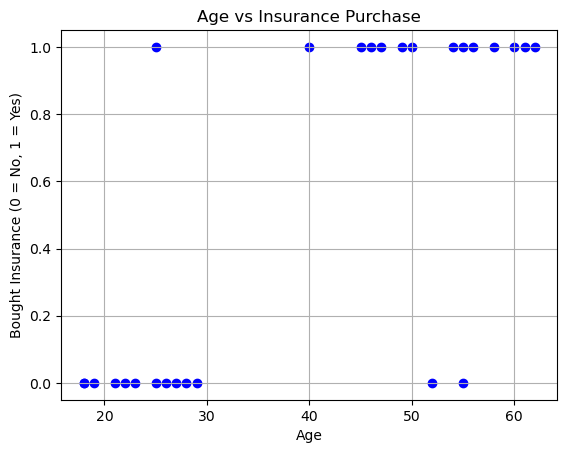

In [3]:
#to visualise the data 
plt.scatter(data['age'], data['bought_insurance'], color='blue', marker='o')
plt.xlabel('Age')
plt.ylabel('Bought Insurance (0 = No, 1 = Yes)')
plt.title('Age vs Insurance Purchase')
plt.grid(True)
plt.show()

In [5]:
# to  Prepare Data for Model
X = data[['age']]           # independent variable
y = data['bought_insurance']  # dependent variable

In [6]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 21
Testing samples: 6


In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")


Logistic Regression model trained successfully!


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Predicted values:", y_pred)
print("Actual values:", list(y_test.values))

# Model Evaluation
print("\n✅ Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Predicted values: [1 0 1 0 0 0]
Actual values: [np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0)]

✅ Model Evaluation:
Accuracy: 1.0

Confusion Matrix:
 [[4 0]
 [0 2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



C:\Users\Ananya N L\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


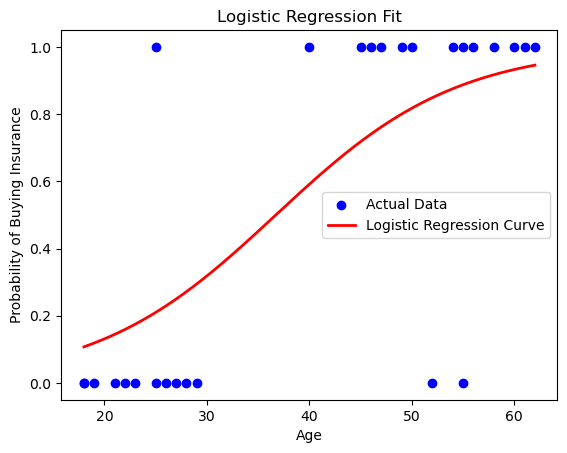

In [10]:
import numpy as np
import matplotlib.pyplot as plt

X_range = np.linspace(data.age.min(), data.age.max(), 1000).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1]

plt.scatter(data['age'], data['bought_insurance'], color='blue', label='Actual Data')
plt.plot(X_range, y_prob, color='red', linewidth=2, label='Logistic Regression Curve')
plt.xlabel('Age')
plt.ylabel('Probability of Buying Insurance')
plt.title('Logistic Regression Fit')
plt.legend()
plt.show()


In [11]:
import pandas as pd

# Predict for new age value
new_age = pd.DataFrame({'age': [35]})
prediction = model.predict(new_age)
probability = model.predict_proba(new_age)[0][1]

print(f"For a person aged 35:")
print(f"Predicted class: {prediction[0]} (1 = will buy insurance, 0 = will not)")
print(f"Predicted probability: {probability:.2f}")


For a person aged 35:
Predicted class: 0 (1 = will buy insurance, 0 = will not)
Predicted probability: 0.45


In [12]:
# 🔹 Option 2: Interactive input (run in notebook)
age_input = float(input("Enter the person's age: "))
pred = model.predict([[age_input]])[0]
prob = model.predict_proba([[age_input]])[0][1]

print(f"\nPredicted Class: {pred} (1 = will buy insurance, 0 = will not)")
print(f"Probability of buying insurance: {prob:.2f}")


Enter the person's age:  42



Predicted Class: 1 (1 = will buy insurance, 0 = will not)
Probability of buying insurance: 0.64


C:\Users\Ananya N L\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Ananya N L\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
